In [ ]:
from pathlib import Path
import os

# Setup main data path
data_path = Path(r"C:\Users\tharu\OneDrive\Desktop\Image Recognition\Oral cancer dataset")

# Define train and test paths
train_dir = data_path / "Train"
test_dir = data_path / "Test"

# Print paths to verify
print(f"Dataset Path: {data_path}")
print(f"Train Path: {train_dir}")
print(f"Test Path: {test_dir}")

# Set your dataset path
dataset_path = r"C:\Users\tharu\OneDrive\Desktop\Image Recognition\Oral cancer dataset"

def walk_through_dir(dir_path):
    """Walks through dir_path and prints its structure."""
    for dirpath, dirnames, filenames in os.walk(dir_path):
        # Filter image files only
        image_files = [f for f in filenames if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        print(f"There are {len(dirnames)} directories and {len(image_files)} images in '{dirpath}'.")

# ✅ Make sure to define the function **before** calling it
dataset_path = r"C:\Users\tharu\OneDrive\Desktop\Image Recognition\Oral cancer dataset"

# ✅ Call the function after defining it
walk_through_dir(dataset_path)



Dataset Path: C:\Users\tharu\OneDrive\Desktop\Image Recognition\Oral cancer dataset
Train Path: C:\Users\tharu\OneDrive\Desktop\Image Recognition\Oral cancer dataset\Train
Test Path: C:\Users\tharu\OneDrive\Desktop\Image Recognition\Oral cancer dataset\Test
There are 2 directories and 0 images in 'C:\Users\tharu\OneDrive\Desktop\Image Recognition\Oral cancer dataset'.
There are 4 directories and 0 images in 'C:\Users\tharu\OneDrive\Desktop\Image Recognition\Oral cancer dataset\Test'.
There are 0 directories and 552 images in 'C:\Users\tharu\OneDrive\Desktop\Image Recognition\Oral cancer dataset\Test\cancer'.
There are 0 directories and 1 images in 'C:\Users\tharu\OneDrive\Desktop\Image Recognition\Oral cancer dataset\Test\erythroplakia'.
There are 0 directories and 1 images in 'C:\Users\tharu\OneDrive\Desktop\Image Recognition\Oral cancer dataset\Test\leukoplakia'.
There are 0 directories and 1 images in 'C:\Users\tharu\OneDrive\Desktop\Image Recognition\Oral cancer dataset\Test\non-ca

Visualizing an image

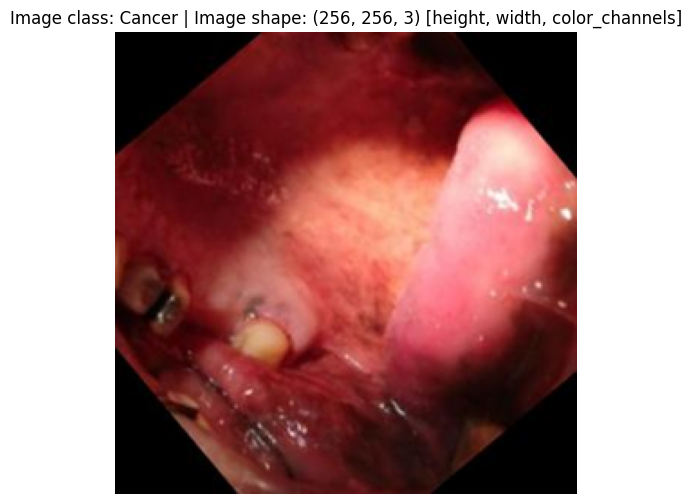

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

# Set the path to your dataset
image_folder = r"C:\Users\tharu\OneDrive\Desktop\Image Recognition\Oral cancer dataset\train\cancer"

# Get a random image from the folder
image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
random_image = np.random.choice(image_files)

# Load the image
img_path = os.path.join(image_folder, random_image)
img = Image.open(img_path)

# Resize while keeping aspect ratio
target_size = (256, 256)
img.thumbnail(target_size)  # Maintains aspect ratio

# Convert image to NumPy array
img_as_array = np.asarray(img)

# Plot the image
plt.figure(figsize=(6, 6))
plt.imshow(img_as_array)
plt.title(f"Image class: Cancer | Image shape: {img_as_array.shape} [height, width, color_channels]")
plt.axis(False)
plt.show()


Transforming Data

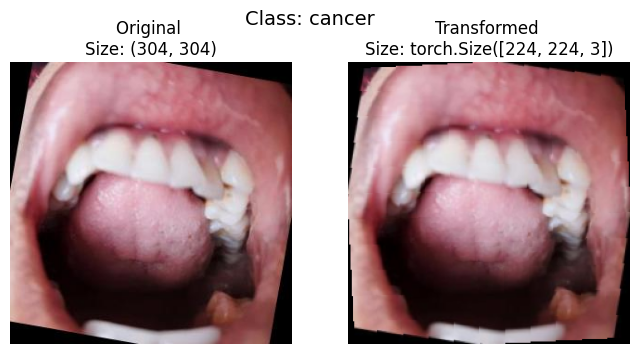

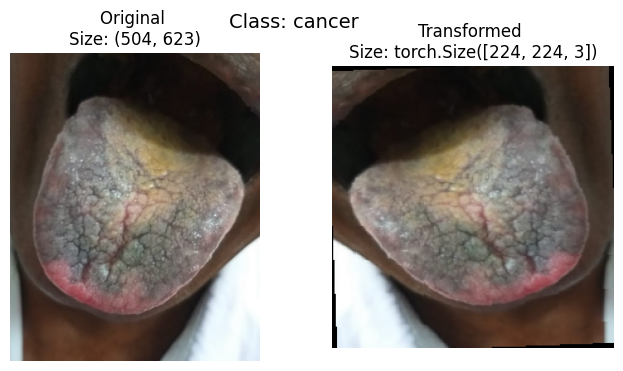

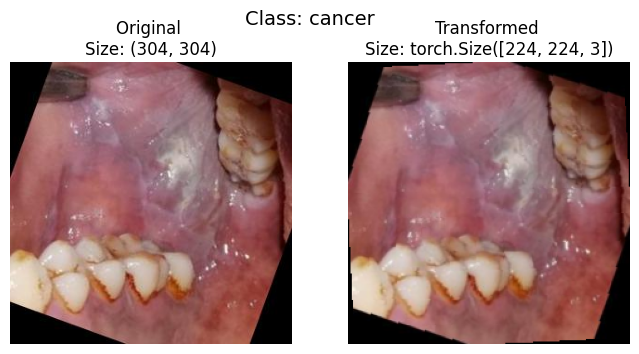

In [2]:
import os
import random
import numpy as np
import torch
import matplotlib.pyplot as plt
from PIL import Image
from pathlib import Path
import torchvision.transforms as transforms

# Define dataset path
image_folder = Path(r"C:\Users\tharu\OneDrive\Desktop\Image Recognition\Oral cancer dataset\train\cancer")

# Get all image paths
image_paths = [str(image_folder / f) for f in os.listdir(image_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

# Define transformations
data_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),  # Resize image
    transforms.RandomHorizontalFlip(p=0.5),  
    transforms.RandomRotation(degrees=10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])


def denormalize(tensor, mean, std):
    """Reverses the normalization applied to an image tensor."""
    mean = torch.tensor(mean).view(1, 1, 3)  # Convert to PyTorch tensor
    std = torch.tensor(std).view(1, 1, 3)    # Convert to PyTorch tensor

    if isinstance(tensor, np.ndarray):  # Convert NumPy array to tensor
        tensor = torch.tensor(tensor)

    return tensor * std + mean  # Element-wise multiplication and addition


# Function to plot original and transformed images
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)

    for image_path in random_image_paths:
        image_path = Path(image_path)
        with Image.open(image_path).convert("RGB") as img:
            fig, ax = plt.subplots(1, 2, figsize=(8, 4))

            # Original Image
            ax[0].imshow(img)
            ax[0].set_title(f"Original \nSize: {img.size}")
            ax[0].axis("off")

            # Transformed Image
            transformed_image = transform(img)  # Apply transform
            transformed_image = transformed_image.numpy().transpose(1, 2, 0)  # Convert to NumPy format

            # Denormalize for visualization
            mean = [0.485, 0.456, 0.406]
            std = [0.229, 0.224, 0.225]
            transformed_image = denormalize(transformed_image, mean, std).clip(0, 1)

            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=14)
            plt.show()

# Run the function
plot_transformed_images(image_paths, transform=data_transform, n=3)


In [3]:
# Use ImageFolder to create dataset(s)
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir, # target folder of images
                                  transform=data_transform, # transforms to perform on data (images)
                                  target_transform=None) # transforms to perform on labels (if necessary)

test_data = datasets.ImageFolder(root=test_dir, 
                                 transform=data_transform)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

NameError: name 'train_dir' is not defined

In [ ]:
# Get class names as a list
class_names = train_data.classes
class_names

['cancer', 'erythroplakia', 'leukoplakia', 'non-cancer']

In [ ]:
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.8044, -1.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].


Original shape: torch.Size([3, 224, 224]) -> [color_channels, height, width]
Image permute shape: torch.Size([224, 224, 3]) -> [height, width, color_channels]


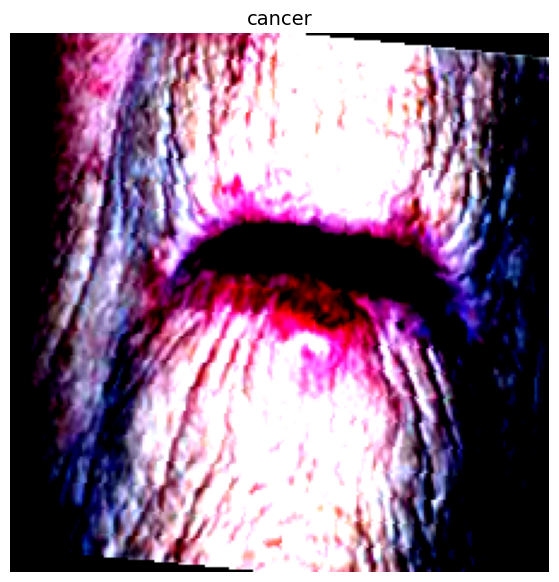

In [ ]:
# Rearrange the order of dimensions
img_permute = img.permute(1, 2, 0)

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")
plt.title(class_names[label], fontsize=14);

In [ ]:
from torch.utils.data import DataLoader

# Define batch size
BATCH_SIZE = 32 


# Create DataLoaders
train_loader = DataLoader(train_data, 
                          batch_size=BATCH_SIZE, 
                          shuffle=True, 
                          num_workers=4, 
                          pin_memory=True)

test_loader = DataLoader(test_data, 
                         batch_size=BATCH_SIZE, 
                         shuffle=False, 
                         num_workers=4, 
                         pin_memory=True)

# Check batch shape
images, labels = next(iter(train_loader))
print(f"Batch shape: {images.shape}")  

print(f"Labels shape: {labels.shape}")  



Batch shape: torch.Size([32, 3, 224, 224])
Labels shape: torch.Size([32])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.558952..1.82].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.558952..1.8112855].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.558952..1.6244541].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.558952..1.6967788].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.558952..1.82].


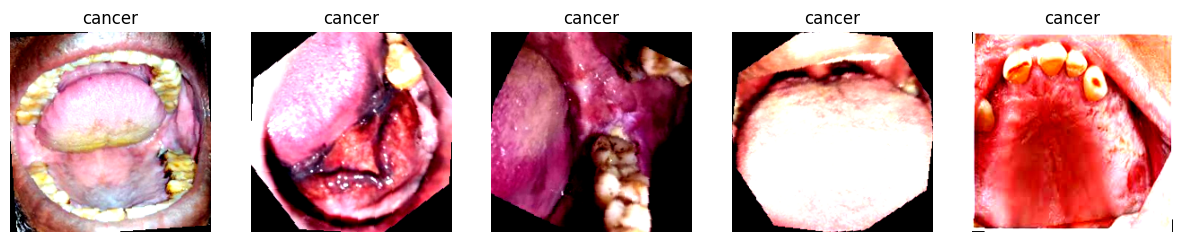

In [ ]:
import random
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

# Define class names (Get from ImageFolder dataset)
class_names = train_data.classes  # Extract class labels from ImageFolder

# Function to display random images from the DataLoader
def show_random_images(dataloader, num_images=5):
    """Displays random images from the DataLoader with their class labels."""
    # Get one batch of images and labels
    images, labels = next(iter(dataloader))
    
    # Select random indices from the batch
    random_indices = random.sample(range(len(images)), k=num_images)
    
    # Plot the images
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i, idx in enumerate(random_indices):
        img = images[idx].permute(1, 2, 0).cpu().numpy()  # Convert tensor to NumPy
        img = img * 0.5 + 0.5  # Unnormalize (assuming mean=[0.5], std=[0.5])
        
        axes[i].imshow(img)
        axes[i].set_title(class_names[labels[idx].item()])
        axes[i].axis("off")

    plt.show()

# Call the function to display random images
show_random_images(train_loader, num_images=5)
